Thi Hoang | 06.11.2025

# Aufgabe OpenCV

Lade das Bild `images/cat.png` und führe folgende Schritte durch:

1. **Bildskalierung:** Verkleinere das Bild auf die Hälfte der ursprünglichen Größe.

2. **Rotation:** Drehe das Bild um 30 Grad im Uhrzeigersinn.

3. **Kantenerkennung:**

    • Wende den Sobel-Filter in X- und Y-Richtung an und kombiniere die Ergebnisse.

    • Wende zusätzlich den Canny-Filter an, um die Kanten hervorzuheben.

4. **Vergleich der Ergebnisse:** Erstelle eine Darstellung, die das Originalbild und die Ergebnisse der Sobel- und Canny-Filter nebeneinander zeigt.

In [1]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

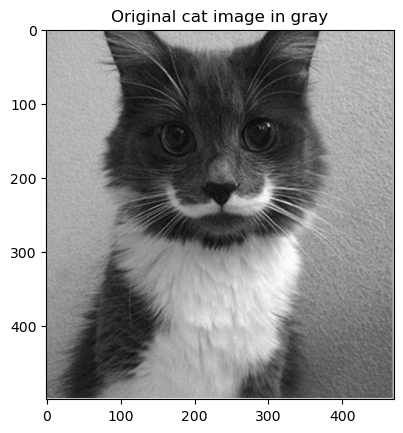

In [2]:
image_path = "images/cat2.png"
original_image = cv2.imread(image_path)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # the image is converted to grayscale so that the edge detectors work better (they work on the intensity (brightness), not colours

if original_image is None or image is None:
    raise FileNotFoundError(f"Couldn't load {image_path} 😿")

plt.imshow(image, cmap = "gray")
plt.title("Original cat image in gray")
plt.show()

## 1. Bildskalierung 
Verkleinere das Bild auf die Hälfte der ursprünglichen Größe.

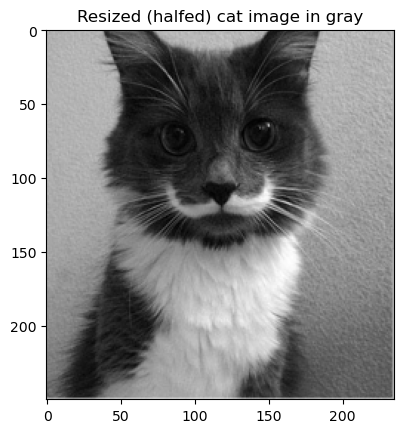

In [3]:
(h, w) = image.shape[:2]
resized_image = cv2.resize(image, (w // 2, h //2), interpolation = cv2.INTER_AREA)

plt.imshow(resized_image, cmap = "gray")
plt.title("Resized (halfed) cat image in gray")
plt.show()

## 2. Rotatio
Drehe das Bild um 30 Grad im Uhrzeigersinn.

Rotation matrix:
 [[  0.8660254   -0.5         78.17502776]
 [  0.5          0.8660254  -41.75317547]]


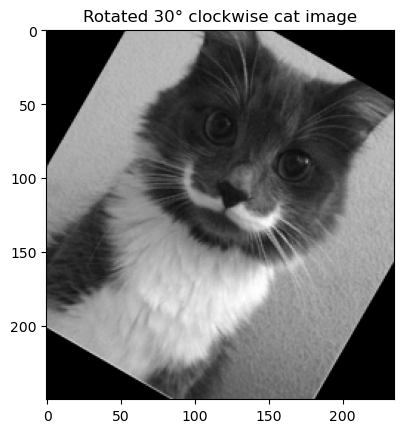

In [4]:
angle = -30 # negative = clockwise in OpenCV
scale = 1.0
center = (resized_image.shape[1] // 2, resized_image.shape[0] // 2) # (x, y)

rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
print("Rotation matrix:\n", rotation_matrix)

rotated_image = cv2.warpAffine(
    resized_image, rotation_matrix,
    (resized_image.shape[1], resized_image.shape[0]) # output size (width, height)
)

plt.imshow(rotated_image, cmap = "gray")
plt.title("Rotated 30° clockwise cat image")
plt.show()

## 3. Kantenerkennung

### Wende den Sobel-Filter in X-Richtung

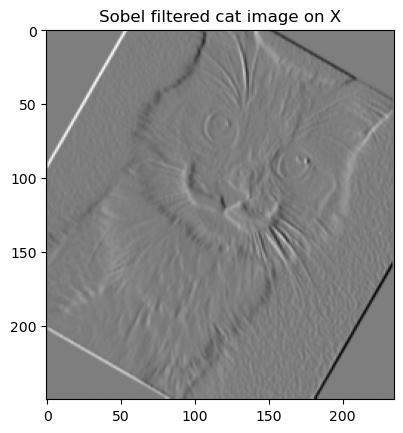

In [5]:
sobel_x = cv2.Sobel(rotated_image, cv2.CV_64F, 1, 0, ksize = 3)
plt.imshow(sobel_x, cmap = 'gray')
plt.title('Sobel filtered cat image on X')
plt.show()

### Wende den Sobel-Filter in Y-Richtung

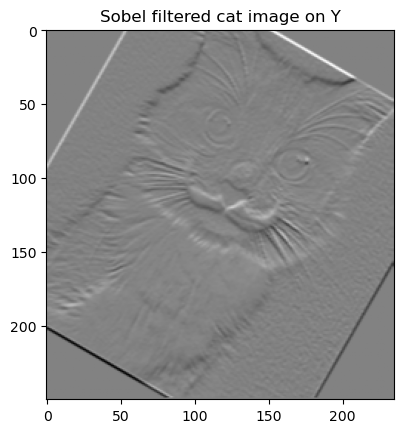

In [6]:
sobel_y = cv2.Sobel(rotated_image, cv2.CV_64F, 0, 1, ksize = 3)
plt.imshow(sobel_y, cmap = 'gray')
plt.title('Sobel filtered cat image on Y')
plt.show()

### Kombiniere die Ergebnisse

C:\Users\am-user584\AppData\Local\anaconda3\Lib\site-packages\matplotlib\colors.py:2293: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


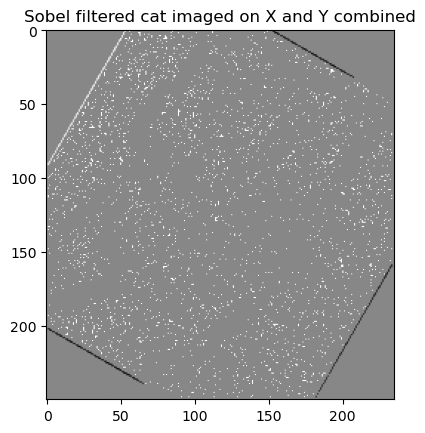

In [7]:
sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)
plt.imshow(sobel_combined, cmap = 'gray')
plt.title('Sobel filtered cat imaged on X and Y combined')
plt.show()

### Wende zusätzlich den Canny-Filter an, um die Kanten hervorzuheben.

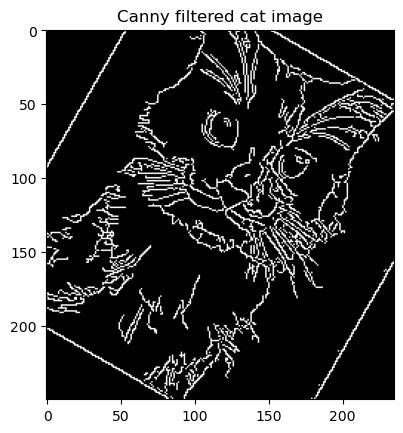

In [8]:
canny_edges = cv2.Canny(rotated_image, threshold1 = 50, threshold2 = 150)
plt.imshow(canny_edges, cmap = "gray")
plt.title("Canny filtered cat image")
plt.show()

## 4. Vergleich der Ergebnisse
Erstelle eine Darstellung, die das Originalbild und die Ergebnisse der Sobel- und Canny-Filter nebeneinander zeigt.

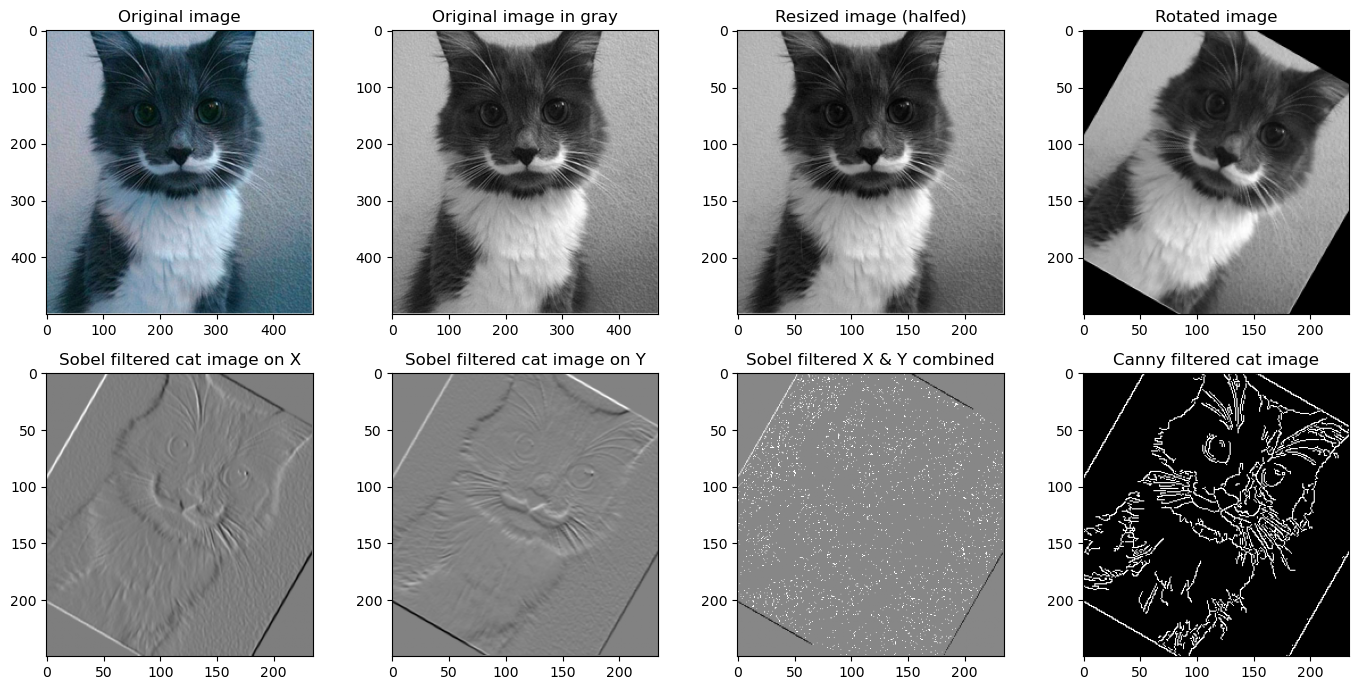

In [9]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 4, 1)
plt.title("Original image")
plt.imshow(original_image)

plt.subplot(2, 4, 2)
plt.title("Original image in gray")
plt.imshow(image, cmap = "gray")

plt.subplot(2, 4, 3)
plt.title("Resized image (halfed)")
plt.imshow(resized_image, cmap = "gray")

plt.subplot(2, 4, 4)
plt.title("Rotated image")
plt.imshow(rotated_image, cmap = "gray")

plt.subplot(2, 4, 5)
plt.title("Sobel filtered cat image on X")
plt.imshow(sobel_x, cmap = "gray")

plt.subplot(2, 4, 6)
plt.title("Sobel filtered cat image on Y")
plt.imshow(sobel_y, cmap = "gray")

plt.subplot(2, 4, 7)
plt.title("Sobel filtered X & Y combined")
plt.imshow(sobel_combined, cmap = "gray")

plt.subplot(2, 4, 8)
plt.title("Canny filtered cat image")
plt.imshow(canny_edges, cmap = "gray")

plt.tight_layout()
plt.show()